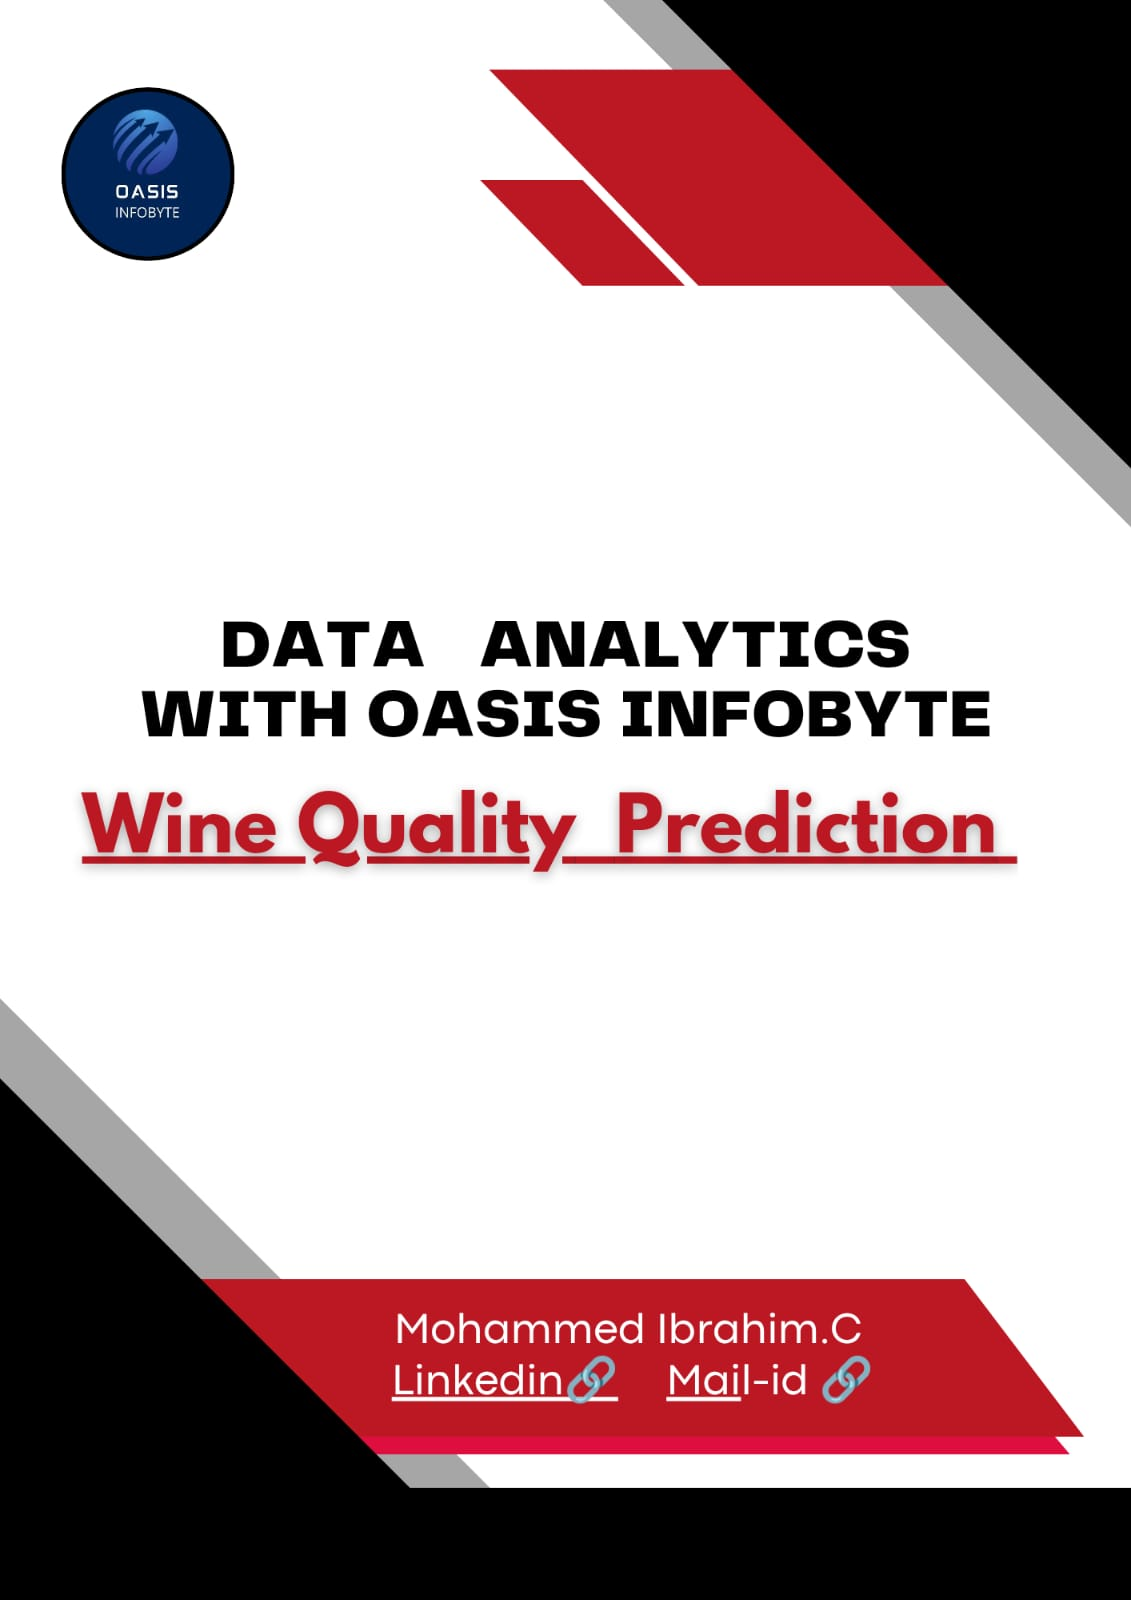

#**Wine Quality Prediction**
**Objective:**

This project aims to develop machine learning models for predicting wine quality based on chemical characteristics. Utilizing diverse attributes like density and acidity, we'll build three classifiers to accurately classify wine quality. This real-world application demonstrates the potential of machine learning in viticulture, aiding winemakers in making informed decisions and potentially enhancing wine production processes.

**Colab**-[link](https://colab.research.google.com/drive/1gY_SFoxob5NUOVaZzWMDZecTdJAnjYpn?usp=sharing)

**Dataset**-[link](https://drive.google.com/file/d/14cKpXuGORKfqNdJ7n2PnRfI6ugzJkNGl/view?usp=drive_link)

**Problem Statement**

Ensuring wine quality is a pivotal concern for producers and consumers alike. This project seeks to address the challenge of predicting wine quality using machine learning techniques, providing a practical application within the viticulture domain. The dataset at hand comprises a range of chemical attributes, such as density and acidity, which are pivotal in determining wine quality. Our objective is to develop three distinct classifier models that leverage these diverse chemical features to accurately predict wine quality. By doing so, we aim to offer winemakers and viticulturists a valuable tool for enhancing quality control processes and refining production strategies.


**import libraries**

This code imports essential libraries like NumPy, Pandas, Matplotlib, and Seaborn for data manipulation and visualization. It also suppresses warnings for cleaner output.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

**Google Drive Mounting:**

In [7]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import pandas as pd
df=pd.read_csv("/content/gdrive/MyDrive/OASIS Infobyte/WineQT.csv")

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
df = df.drop("Id",axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


**Dataframe Summary with Styling:**

In [12]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


**Data Visualization**


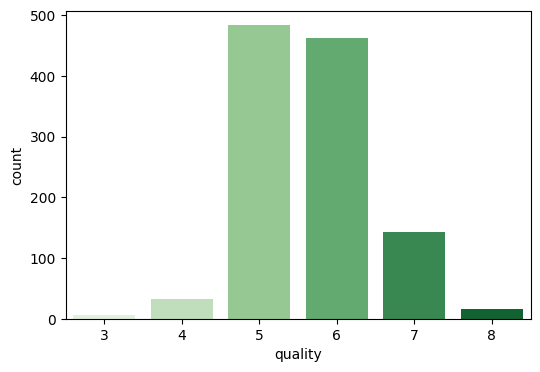

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality',data=df,palette='Greens')
plt.show()

**Correlation Heatmap:**

Visualizes correlation between variables in DataFrame `df` using a heatmap with annotations, showcasing strength and direction of relationships.

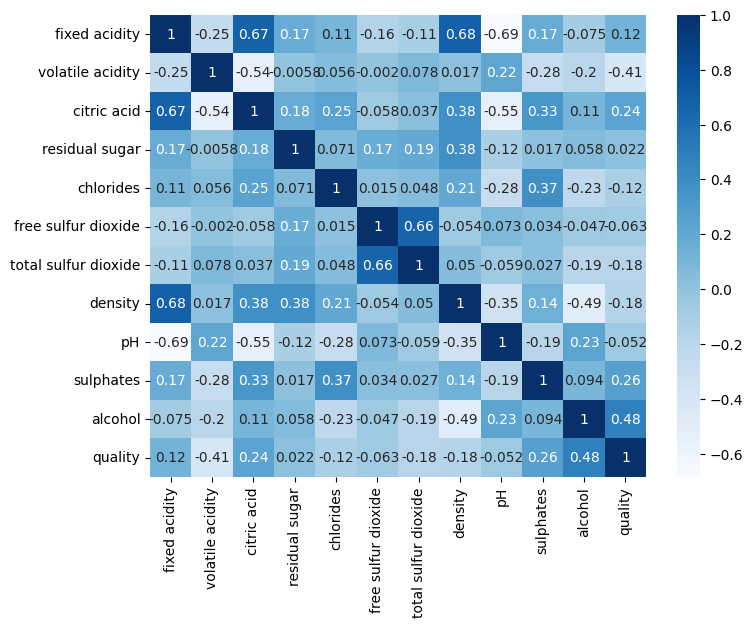

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

#**Scatterplot Visualization:**

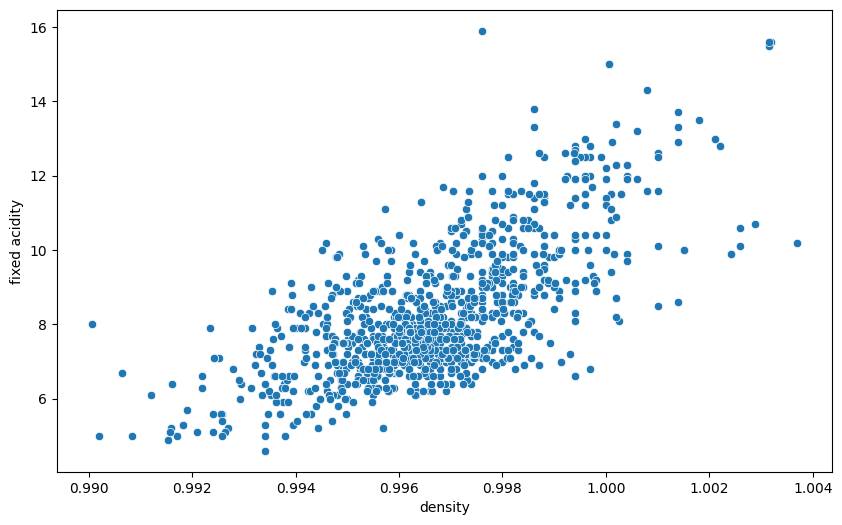

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='density',y='fixed acidity',data=df)
plt.show()

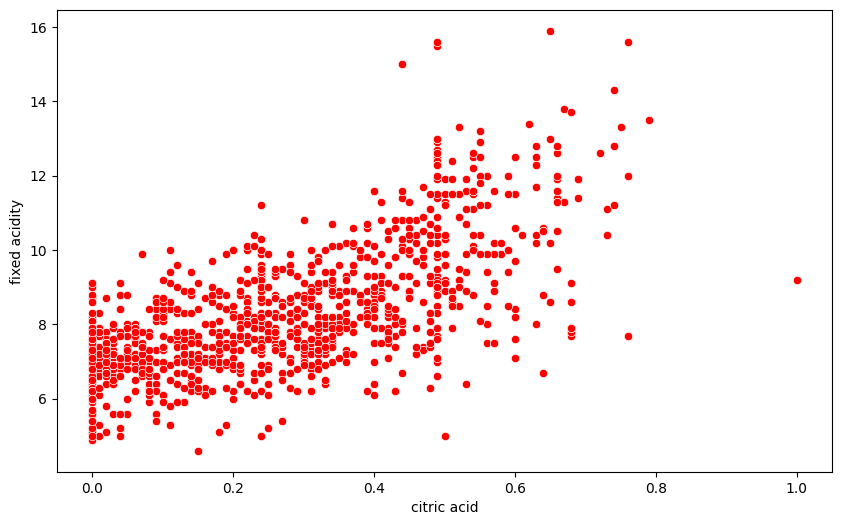

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='citric acid',y='fixed acidity',data=df,color="Red")
plt.show()

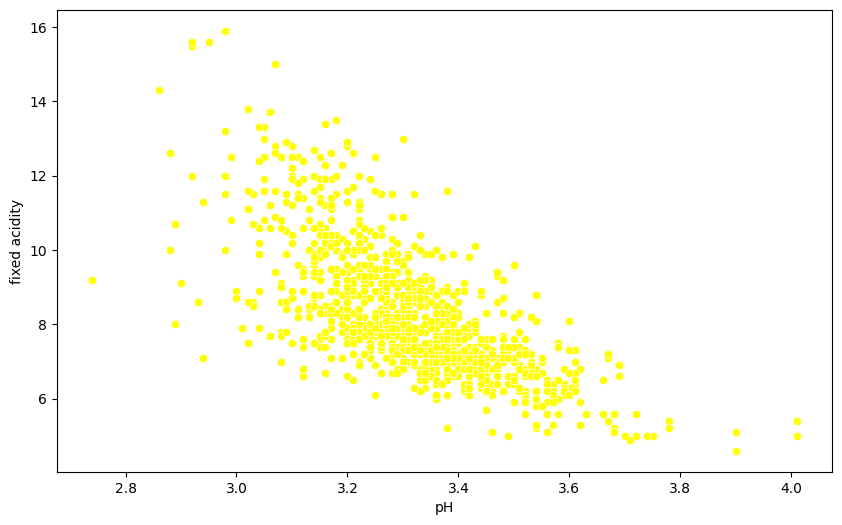

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pH',y='fixed acidity',data=df,color="Yellow")
plt.show()

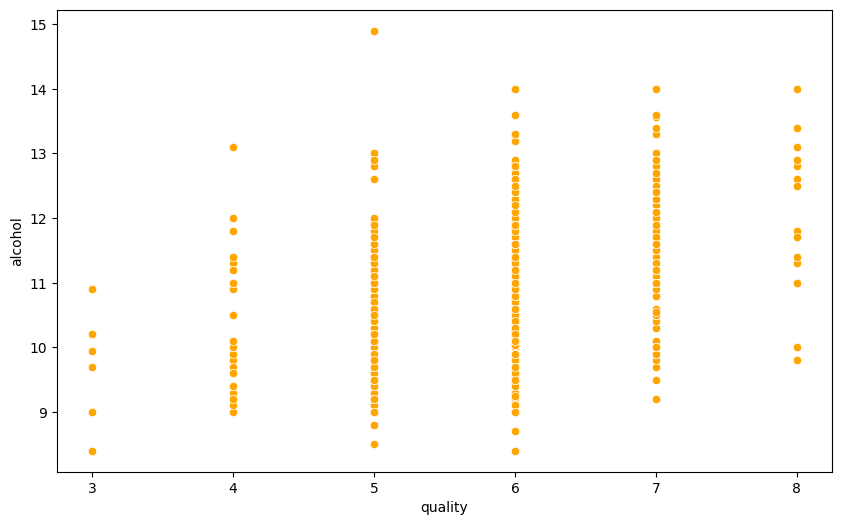

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='quality',y='alcohol',data=df,color="Orange")
plt.show()

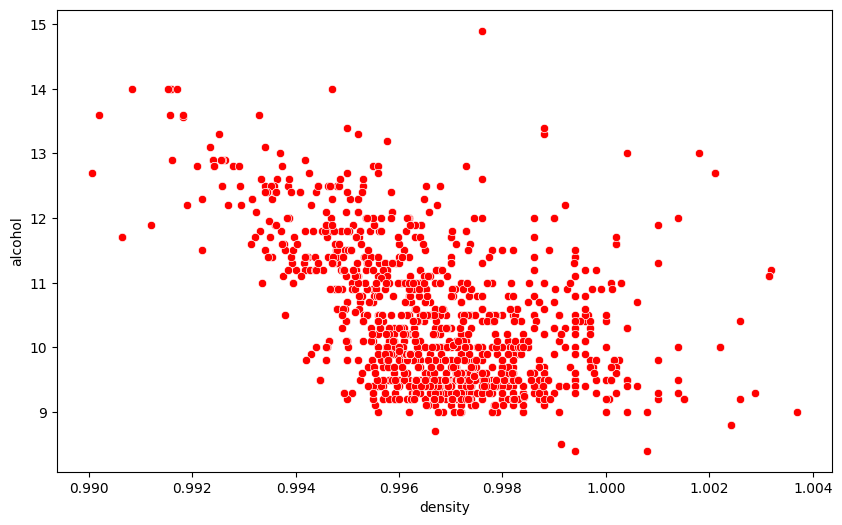

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='density',y='alcohol',data=df,color="Red")
plt.show()

#**Boxplot Visualization:**



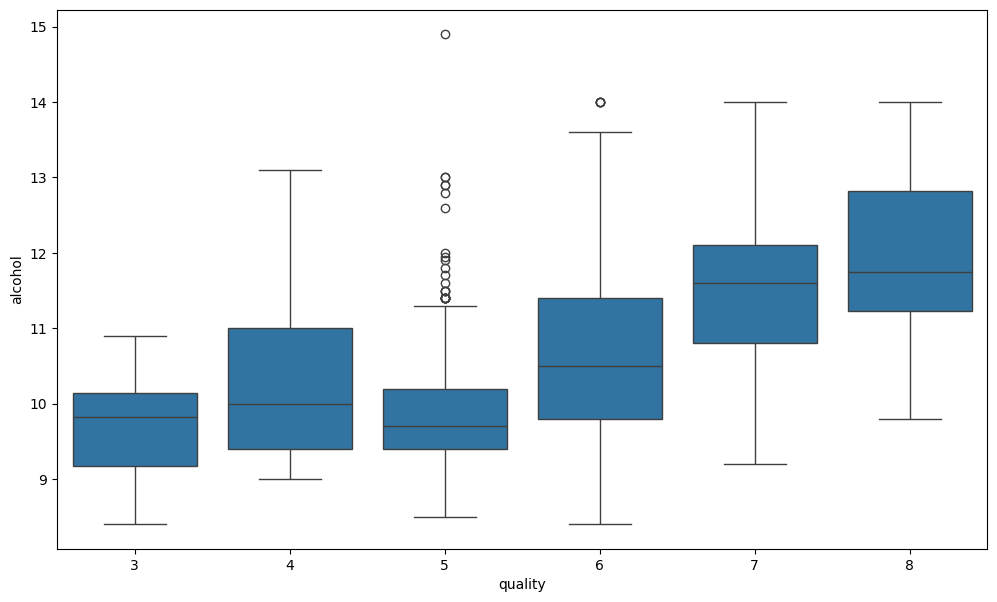

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='alcohol',data=df)
plt.show()

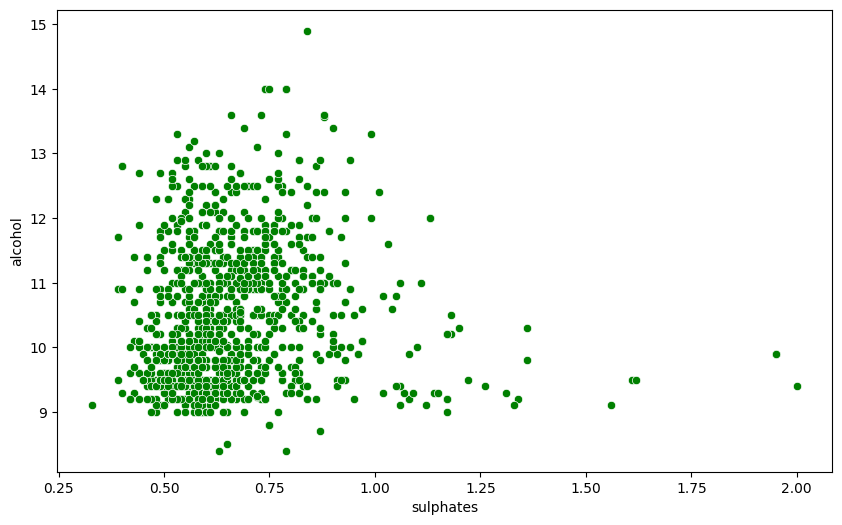

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sulphates',y='alcohol',data=df,color="Green")
plt.show()

**Splitting Data**

In [22]:
x = df.drop(["quality"],axis=1)
y = df["quality"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
x.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [24]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

**Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.72      0.68       100
           6       0.45      0.59      0.51        88
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00         4

    accuracy                           0.54       229
   macro avg       0.18      0.22      0.20       229
weighted avg       0.45      0.54      0.49       229

Accuracy of Logistic Regression is :  54.14847161572053


**Model Evaluation Metrics:**

1. **MAE:** Average absolute difference between predicted and actual values.
2. **MSE:** Average squared difference between predicted and actual values.
3. **RMSE:** Square root of MSE, providing interpretable units.
4. **R2 Score:** Proportion of variance explained by the model.

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))


Mean Absolute Error :  0.5109170305676856
Mean Squared Error :  0.6157205240174672
Root Mean Squared Error :  0.7846786119281366
R2 Score :  0.08472702534157273


**Confusion Matrix Visualization:**

Displays the confusion matrix generated by comparing actual and predicted values from `y_test` and `regpred`, with annotations and a colormap for clarity.

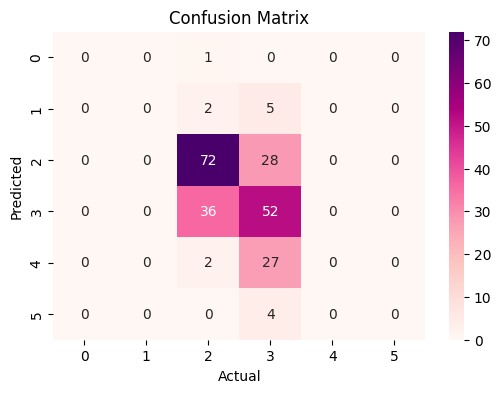

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,regpred),annot=True,cmap="RdPu")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

**Decision Tree**

In [28]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.14      0.12         7
           5       0.69      0.72      0.71       100
           6       0.60      0.56      0.58        88
           7       0.56      0.52      0.54        29
           8       0.20      0.25      0.22         4

    accuracy                           0.60       229
   macro avg       0.36      0.36      0.36       229
weighted avg       0.61      0.60      0.61       229

Accuracy of Decision Tree is :  60.26200873362445


In [29]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.47161572052401746
Mean Squared Error :  0.6200873362445415
Root Mean Squared Error :  0.7874562440190195
R2 Score :  0.07823572764895981


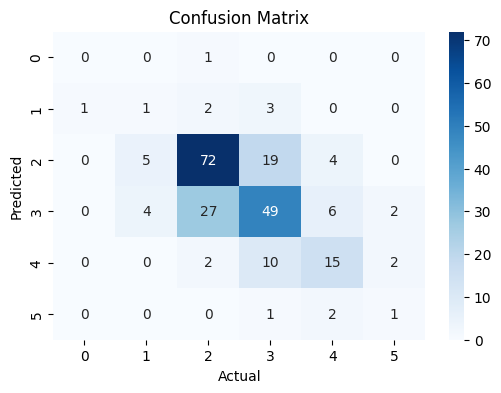

In [30]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,dtreepred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

**Random Forest Classification:**

Utilizes RandomForestClassifier from sklearn.ensemble to train a model with 100 decision trees. It predicts labels for test data and evaluates classification performance using classification_report and accuracy_score.

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.74      0.72       100
           6       0.59      0.66      0.62        88
           7       0.68      0.59      0.63        29
           8       1.00      0.25      0.40         4

    accuracy                           0.66       229
   macro avg       0.50      0.37      0.40       229
weighted avg       0.64      0.66      0.64       229

Accuracy of Random Forest is is :  65.50218340611353


In [32]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.37554585152838427
Mean Squared Error :  0.4366812227074236
Root Mean Squared Error :  0.6608186004550898
R2 Score :  0.35087023073870405


**Confusion Matrix Visualization:**

Illustrates the confusion matrix derived from comparing actual and predicted labels using RandomForestClassifier, with annotations and an "Oranges" colormap for clarity.

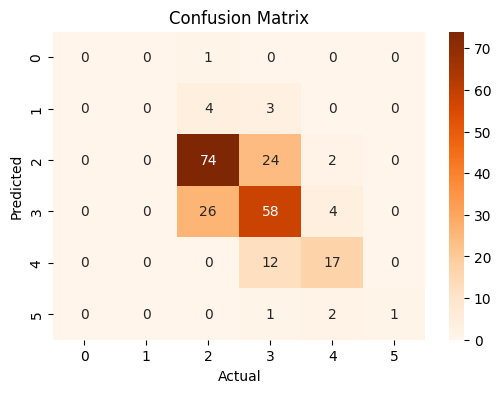

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,rfpred),annot=True,cmap="Oranges")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

**Hyper Parameter Tuning**

In [34]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)



RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)


In [35]:
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(x_train, y_train)
y_pred_grid = rf.predict(x_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.74      0.70      0.72       105
           6       0.66      0.59      0.62        98
           7       0.59      0.68      0.63        25
           8       0.25      1.00      0.40         1

    accuracy                           0.66       229
   macro avg       0.37      0.50      0.40       229
weighted avg       0.69      0.66      0.67       229



**Model Performance Comparision**

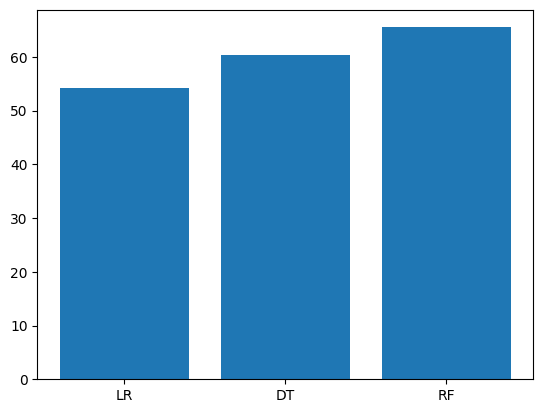

In [36]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

**Feature Importance Calculation:**

Calculates the importance of features in RandomForestClassifier model and creates a DataFrame to display feature names and their respective importances, sorted in descending order.

In [37]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                 feature  importance
10               alcohol    0.141464
9              sulphates    0.117666
1       volatile acidity    0.112675
6   total sulfur dioxide    0.104034
7                density    0.089901
4              chlorides    0.079469
8                     pH    0.075236
2            citric acid    0.074049
0          fixed acidity    0.073022
3         residual sugar    0.068436
5    free sulfur dioxide    0.064047


**Conclusion:**

1. **Model Performance Comparison:** Random Forest demonstrates superior accuracy compared to Logistic Regression and Decision Tree models.

2. **Feature Importance Analysis:** "Alcohol," "sulphates," and "volatile acidity" emerge as pivotal features for predicting wine quality, highlighting their significant impact on overall quality.

3. **Imbalanced Data:** The dataset showcases a slight imbalance, emphasizing the need for addressing class imbalance to maintain model efficacy.

4. **Impact of Hyperparameter Tuning:** Although hyperparameter tuning may not drastically enhance overall accuracy, it positively influences precision, recall, and F1 score. This underscores its importance in improving the model's ability to correctly classify positive and negative instances.

5. **Tuning Techniques Used:** Employing GridSearchCV and RandomizedSearchCV facilitates exploring various hyperparameter combinations, leading to the identification of optimal configurations that maximize model performance metrics.

In summary, this analysis underscores the efficacy of Random Forest in predicting wine quality, identifies key features driving predictions, emphasizes the importance of addressing data imbalance, and highlights the positive impact of hyperparameter tuning on model performance.